C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_11512\3453740904.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(index='Treatment', columns='membership', values='count', aggfunc='sum', fill_value=0)


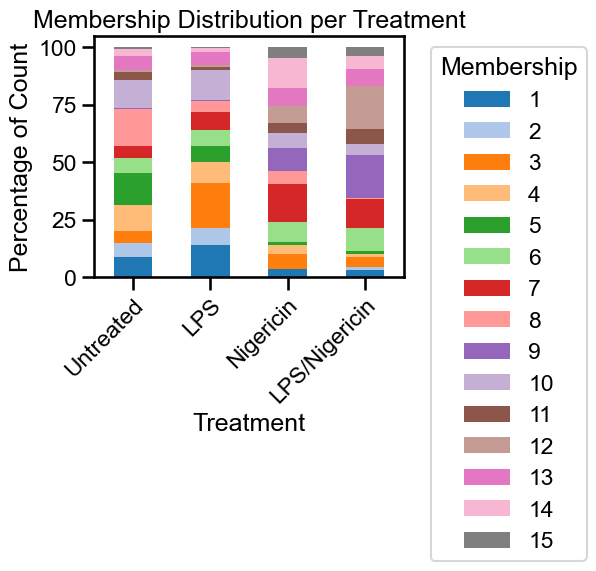

In [33]:
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

df = pd.read_csv(r'Data\clusters_per_treatment.csv')

df = df[df['membership'] != -1]

# Convert membership to ordered categorical type
membership_order = sorted(df['membership'].unique(), key=lambda x: int(x))
cat_type = CategoricalDtype(categories=membership_order, ordered=True)
df['membership'] = df['membership'].astype(cat_type)

# Change treatment names
df['Treatment'] = df['Treatment'].replace({
    'Unprimed/Unactivated': 'Untreated',
    'LPS/Unactivated': 'LPS',
    'Unprimed/Nigericin': 'Nigericin',
    'LPS/Nigericin': 'LPS/Nigericin'
    })

# Define the desired order of Treatment categories
treatment_order = ['Untreated', 'LPS', 'Nigericin', 'LPS/Nigericin']

# Reindex the pivoted DataFrame
df_pivot = df.pivot_table(index='Treatment', columns='membership', values='count', aggfunc='sum', fill_value=0)
df_pivot = df_pivot.reindex(treatment_order)

# Normalize to percentages (optional)
df_percent = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Plot aesthetics
# Set the style and font
plt.rcParams['font.family'] = 'Arial'
sns.set_context('talk')

# Create custom colormap using first 15 colors from tab20
cmap = plt.get_cmap('tab20')
custom_colors = [cmap(i) for i in range(15)]

# Plot the stacked bar chart
ax = df_percent.plot(kind='bar', stacked=True, color=custom_colors)

# Add labels and title
plt.ylabel('Percentage of Count')
plt.title('Membership Distribution per Treatment')
plt.legend(title='Membership', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")
plt.tight_layout()
plt.savefig('Clusters_per_treatment_StackedBar.pdf', bbox_inches='tight')
plt.show()

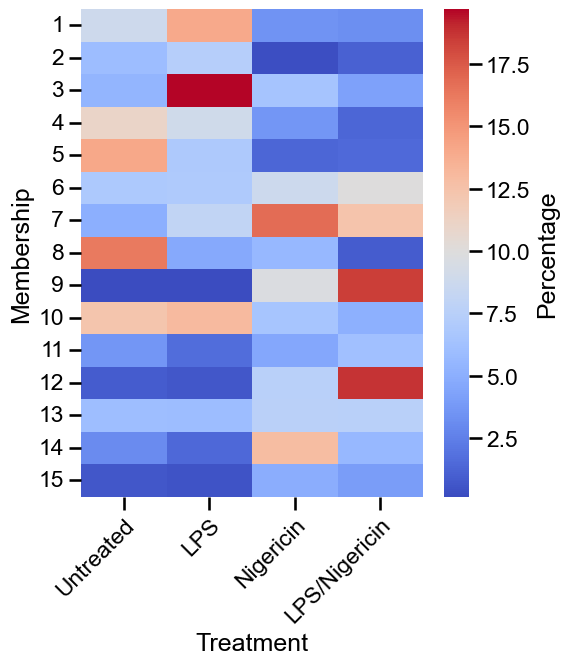

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame
df_transposed = df_percent.T  

# Plot the heatmap
plt.figure(figsize=(6, 7))
ax = sns.heatmap(df_transposed, annot=False, fmt=".1f", cbar_kws={'label': 'Percentage'}, cmap='coolwarm')

# Rotate axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
plt.ylabel("Membership")
plt.xlabel("Treatment")
plt.tight_layout()
plt.savefig('Clusters_per_treatment_Heatmap.pdf', bbox_inches='tight')
plt.show()
